DEBSCAN:density based spatial clustering of application with noise
DBSCAN is good in handling outliers. it doesnt add them to any clusters
we do not need to define number of clusters in advance like others
It handles well arbetary shapes unlike others which fails .

dbscan not works well in varying density areas.(good for high density)
may not works well when we have many features

Main topics in this:(we tune eps and min sample)
*epsilon(eps):neighbourhood distance.(to define closeness using euclidean distance)(radius of cirle from point a)
*minimum sample- minimum datapoints to define a cluster(including core point)
*core points- for a given point a, if it satisfies minimumsample criteria within epsilon radius 
*border point-
should not be core point.
if it reachable from a core point(i.e. circle from border point with epsilon radius should cover atleast 1 core point)
*noise point-neither a core/border point(outlier)

Directly density reachable:
point s is directly reachable from q?
Then It must satisfy 2 conditions.
*s must be neighbour of q
*q must be core point

# DBSCAN Example

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

In [1]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
X = np.array([[1, 2], [3, 4], [4, 3], [8, 7], [8, 8], [25, 80]])

In [51]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 8,  8],
       [25, 80]])

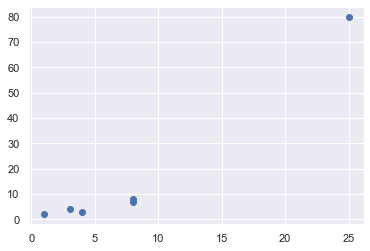

In [52]:
plt.scatter(X[:,0],X[:,1])

In [53]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [54]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

-1 is a noise. Something which is far. eps is distance of closeness

In DBSCAN, centroids are not fixed. It assumes you will give all data points in one go. You can predict on new dataset. Rerun one more time to check new data points.

##### KMEANS

In [55]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0).fit(X)

In [56]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1])

In [57]:
# In kmeans centroid are fixed. For new data it compare from these centers.
kmeans.cluster_centers_

array([[ 4.8,  4.8],
       [25. , 80. ]])

In [58]:
kmeans.predict([[0,0],[12,13]])

array([0, 0])

In [59]:
kmeans.predict([[24,81],[23,85]])

array([1, 1])

##### Deciding Optimal Value for epsilon(eps)

In [60]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors #Unsupervised learner for implementing neighbor searches.
import seaborn as sns
sns.set()

In [61]:
## Generating some data suitable for clustering

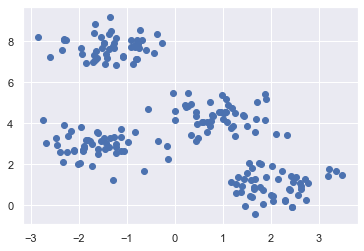

In [62]:
X,y=make_blobs(n_samples=200,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1])

In [63]:
samples=[[0.,0.,0.],[0.,.5, 0.],[1.,1.,0.5]]
neigh=NearestNeighbors(n_neighbors=1) #n_neighbors: Number of neighbors to use
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [64]:
print(neigh.kneighbors([[0.,0.4,0.1]]))

(array([[0.14142136]]), array([[1]], dtype=int64))


In [65]:
print(neigh.kneighbors([[0.1,0.0,0.1]]))

(array([[0.14142136]]), array([[0]], dtype=int64))


NearestNeighbors will tell you which datapoints are close to whcih DP's and what distance.

In [66]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

In [67]:
distances

array([[0.        , 0.3077693 ],
       [0.        , 0.07204812],
       [0.        , 0.15106217],
       [0.        , 0.40987856],
       [0.        , 0.08935554],
       [0.        , 0.21448673],
       [0.        , 0.17200706],
       [0.        , 0.15913959],
       [0.        , 0.24207383],
       [0.        , 0.01966341],
       [0.        , 0.02296282],
       [0.        , 0.01264242],
       [0.        , 0.03905497],
       [0.        , 0.24895377],
       [0.        , 0.1680786 ],
       [0.        , 0.25730896],
       [0.        , 0.03932308],
       [0.        , 0.16328387],
       [0.        , 0.19868524],
       [0.        , 0.21822875],
       [0.        , 0.17967984],
       [0.        , 0.3078788 ],
       [0.        , 0.22596451],
       [0.        , 0.12404174],
       [0.        , 0.13976049],
       [0.        , 0.13156219],
       [0.        , 0.22717367],
       [0.        , 0.1095539 ],
       [0.        , 0.1576804 ],
       [0.        , 0.17539258],
       [0.

In [68]:
indices #which two points are calculating distance i.e [0,62] first entry in distance vector

array([[  0,  62],
       [  1,  88],
       [  2, 197],
       [  3,  60],
       [  4, 140],
       [  5,  94],
       [  6,  84],
       [  7, 119],
       [  8,  35],
       [  9,  37],
       [ 10,  65],
       [ 11, 123],
       [ 12, 112],
       [ 13,  77],
       [ 14, 168],
       [ 15,  35],
       [ 16,  80],
       [ 17,  41],
       [ 18,  48],
       [ 19, 199],
       [ 20, 156],
       [ 21, 163],
       [ 22, 181],
       [ 23,  69],
       [ 24, 107],
       [ 25, 190],
       [ 26,  42],
       [ 27, 190],
       [ 28, 128],
       [ 29, 115],
       [ 30,  75],
       [ 31, 192],
       [ 32,  76],
       [ 33,  62],
       [ 34,  36],
       [ 35,   8],
       [ 36, 196],
       [ 37,   9],
       [ 38, 122],
       [ 39,  64],
       [ 40,  30],
       [ 41, 175],
       [ 42, 100],
       [ 43, 184],
       [ 44,  71],
       [ 45, 117],
       [ 46, 152],
       [ 47,  67],
       [ 48,  97],
       [ 49, 115],
       [ 50,  17],
       [ 51,  88],
       [ 52,

##### Question: In which distance range, most of the distances falling within the data. So, I wiil take the distance and sort it and plot it.

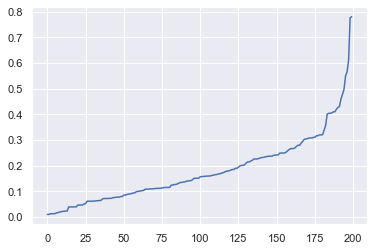

In [69]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

Out of 200 datapoints, mostly distance falling below 0.5 or 0.4. We can't go for a very high level distance. For high level distance, cluster will not make mush sense. So we need to find out a point where a sharp increase where more percentage of points are covering. So we can say 0.4 or 0.5 are candidates for that. 

Let's run DBSCAN data with this distance.

In [70]:
db_cluster=DBSCAN(eps=0.3, min_samples=5)
db_cluster.fit(X)

DBSCAN(eps=0.3)

In [71]:
clusters=db_cluster.labels_

In [72]:
len(set(clusters))

11

In [73]:
#So, 11 clusters are created

##### How to check goodness of our clusters

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
silhouette_score(X,clusters)

0.006404075981596775

0.006 not a good cluster. We can change eps value.

In [76]:
db_cluster=DBSCAN(eps=0.5, min_samples=5)
db_cluster.fit(X)

DBSCAN()

In [77]:
clusters=db_cluster.labels_
len(set(clusters))

5

In [78]:
silhouette_score(X,clusters)

0.5506633757011048

### DBSCAN CLASS DEMO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")


In [3]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

In [4]:
# converting data in data frame object
X=pd.DataFrame(X)
y=pd.DataFrame(y)


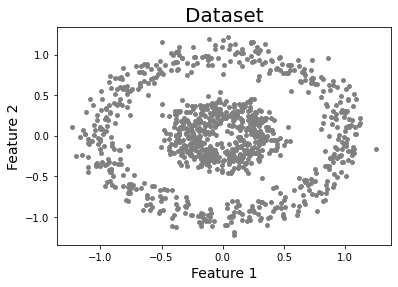

In [5]:
plt.scatter(X[0], X[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

##### Applying K-Means Algorithm to cluster the data

In [6]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(X[[0,1]])


KMeans(n_clusters=2, random_state=42)

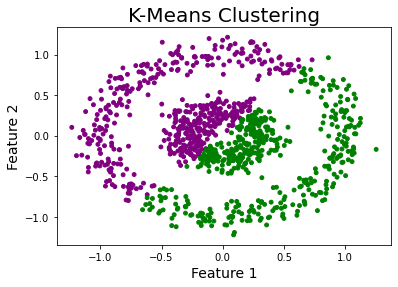

In [7]:
X['KMeans_labels']=k_means.labels_
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.scatter(X[0],X[1],c=X['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


#### Applying default DBSCAN algorithm to cluster the data

In [8]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X[[0,1]])


DBSCAN()

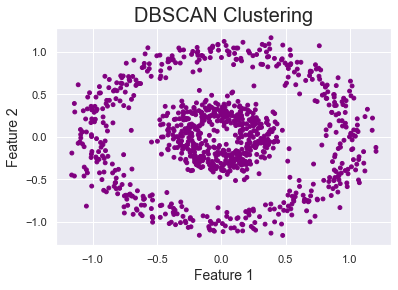

In [86]:
X['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### Evaluate the optimum values of Hyperparameters


In [46]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[[0,1]])
distances, indices = nbrs.kneighbors(X[[0,1]])

In [ ]:
# NearestNeighbors will tell you which datapoints are close to which datapints and what distance
# which two points are calculating distance i.e [0,62] first entry in distance vector
#  In which distance range, most of the distances falling within the data. So, I wiil take the distance and sort it and plot it 

In [32]:
distances

array([[0.        , 0.02612979],
       [0.        , 0.00161531],
       [0.        , 0.01767725],
       ...,
       [0.        , 0.01045492],
       [0.        , 0.02589654],
       [0.        , 0.01768341]])

In [33]:
indices

array([[  0, 779],
       [  1, 252],
       [  2, 704],
       ...,
       [997, 344],
       [998, 412],
       [999, 257]], dtype=int64)

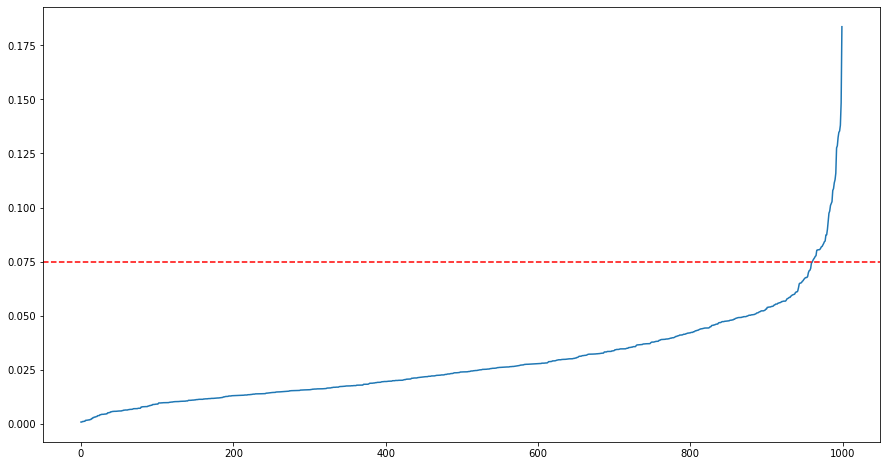

In [47]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.075, color='r', linestyle='--')
# plt.title('K-distance Graph',fontsize=20)
# plt.xlabel('Data Points sorted by distance',fontsize=14)
# plt.ylabel('Epsilon',fontsize=14)
# plt.show()

In [ ]:
#here x axis is just the count y axis is distance which can be considered as epsilon
#which k nearest distance is most common i can consider that, here till 0.075 it is common and then distance suddenyl decreases but count is less 

In [29]:
distances

array([0.00083491, 0.00083491, 0.00106789, 0.00106789, 0.00117932,
       0.00117932, 0.00161531, 0.00161531, 0.00170791, 0.00170791,
       0.00181967, 0.00181967, 0.00199653, 0.00199653, 0.00246634,
       0.00246634, 0.00294131, 0.00294131, 0.0031524 , 0.0031524 ,
       0.00337586, 0.00337586, 0.00378079, 0.00382615, 0.00382615,
       0.00421832, 0.00421832, 0.00438019, 0.00438019, 0.00442698,
       0.00442698, 0.00451284, 0.00451284, 0.00460173, 0.00460173,
       0.00509363, 0.00509363, 0.00521858, 0.00521858, 0.0055546 ,
       0.0055546 , 0.00571067, 0.00571067, 0.00577694, 0.00577694,
       0.00579983, 0.00579983, 0.00584177, 0.00584177, 0.00590634,
       0.00593499, 0.00593499, 0.00595789, 0.00595789, 0.00612148,
       0.00612148, 0.00632168, 0.00632168, 0.00639473, 0.00639473,
       0.00639624, 0.00639624, 0.00656254, 0.00656254, 0.00667041,
       0.00667041, 0.0067096 , 0.0067096 , 0.00682598, 0.00700218,
       0.00700218, 0.00700543, 0.00700543, 0.00703645, 0.00703

In [90]:
eps=0.075
for min_samples in [10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2 
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)


eps= 0.075 | min_samples=  10 | obtained clustering:  [(1, 507), (2, 239), (3, 215), (4, 18), (5, 10), (6, 11)]
eps= 0.075 | min_samples=  11 | obtained clustering:  [(1, 527), (2, 234), (3, 212), (4, 16), (5, 11)]
eps= 0.075 | min_samples=  12 | obtained clustering:  [(1, 560), (2, 232), (3, 208)]
eps= 0.075 | min_samples=  13 | obtained clustering:  [(1, 570), (2, 227), (3, 203)]


### Applying DBSCAN algorithm with Hyperparameters to cluster the data


In [91]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.075,min_samples=12)
dbscan_opt.fit(X[[0,1]])

DBSCAN(eps=0.075, min_samples=12)

In [92]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_
X['DBSCAN_opt_labels'].value_counts()


-1    557
 0    443
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.302


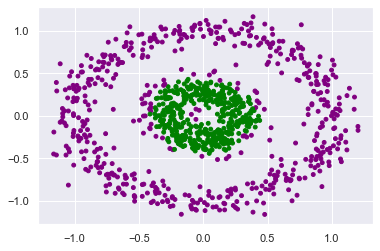

In [93]:
plt.scatter(X[0], X[1], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X['DBSCAN_opt_labels']))

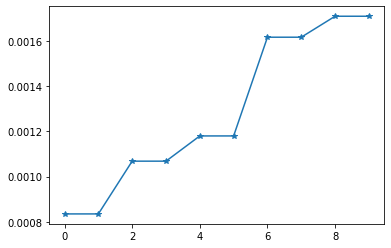

In [37]:
l=[0.00083491, 0.00083491, 0.00106789, 0.00106789, 0.00117932,
       0.00117932, 0.00161531, 0.00161531, 0.00170791, 0.00170791]
plt.plot(l,marker="*")